Build Feedforward neural networks with Keras and TensorFlow for classification of
CIFAR10 image dataset using the following steps:<br>
a. Import the necessary packages<br>
b. Load the training and testing data<br>
c. Define the network architecture using Keras<br>
d. Train the model using SGD/Adam optimizer<br>
e. Evaluate the network<br>
f. Plot the training loss and accuracy<br>

In [2]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10

In [3]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 32 * 32 * 3))
testX = testX.reshape((testX.shape[0], 32 * 32 * 3))

[INFO] loading CIFAR-10 data...


In [4]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [5]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [8]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=32)

[INFO] training network...
Epoch 1/10
1563/1563 [==============================] - 108s 67ms/step - loss: 1.6441 - accuracy: 0.4174 - val_loss: 1.6149 - val_accuracy: 0.4257
Epoch 2/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5655 - accuracy: 0.4495 - val_loss: 1.5729 - val_accuracy: 0.4399
Epoch 3/10
1563/1563 [==============================] - 118s 75ms/step - loss: 1.5097 - accuracy: 0.4678 - val_loss: 1.5175 - val_accuracy: 0.4672
Epoch 4/10
1563/1563 [==============================] - 118s 76ms/step - loss: 1.4637 - accuracy: 0.4861 - val_loss: 1.5591 - val_accuracy: 0.4381
Epoch 5/10
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4223 - accuracy: 0.4992 - val_loss: 1.4556 - val_accuracy: 0.4812
Epoch 6/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.3861 - accuracy: 0.5116 - val_loss: 1.4592 - val_accuracy: 0.4844
Epoch 7/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.3550 - acc

In [9]:
# evaluate the network
print("[INFO] evaluating network...")
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
313/313 [==============================] - 30s 46ms/step
              precision    recall  f1-score   support

    airplane       0.60      0.59      0.60      1000
  automobile       0.67      0.63      0.65      1000
        bird       0.48      0.32      0.38      1000
         cat       0.26      0.73      0.39      1000
        deer       0.52      0.31      0.39      1000
         dog       0.51      0.12      0.19      1000
        frog       0.58      0.53      0.55      1000
       horse       0.47      0.70      0.56      1000
        ship       0.73      0.55      0.62      1000
       truck       0.70      0.48      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.55      0.49      0.49     10000
weighted avg       0.55      0.49      0.49     10000



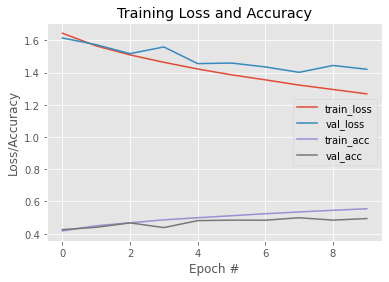

In [11]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.legend()
plt.figure()